In [ ]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 30 kB/s 
     |████████████████████████████████| 198 kB 43.1 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=85459d19de64d4338ea8cfa9e3eddb7db86a116ff31b7f98306c930e40d51212
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [ ]:
import pyspark
from pyspark import SparkContext

In [ ]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

In [ ]:
spark = SparkSession.builder.appName('BreastCancer').getOrCreate()
sc = spark.sparkContext

In [ ]:
df = spark.read\
          .option("header", "true")\
          .option("inferSchema", "true")\
          .csv("Breast_Cancer.csv")
df.show(10)

+---+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+
|_c0|diagnosis|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|
+---+---------+-----------+------------+--------------+---

In [ ]:
print(df.columns)
print(df.count())
data = df

['_c0', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
569


In [ ]:
# Checking to see if there are any null values for age column.
df.filter(df['diagnosis'].isNull()).show()

+---+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+
|_c0|diagnosis|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|
+---+---------+-----------+------------+--------------+---

In [ ]:
import pandas as pd
import numpy as np
df = df.toPandas()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _c0                      569 non-null    int32  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
mean_list= list(df.columns[1:11])

In [ ]:
import pip
pip.main(['install','seaborn','sklearn'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

**EXPLORATORY DATA ANALYSIS**

***USING VIOLIN PLOT FOR FEATURES BY DIAGNOSIS***

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

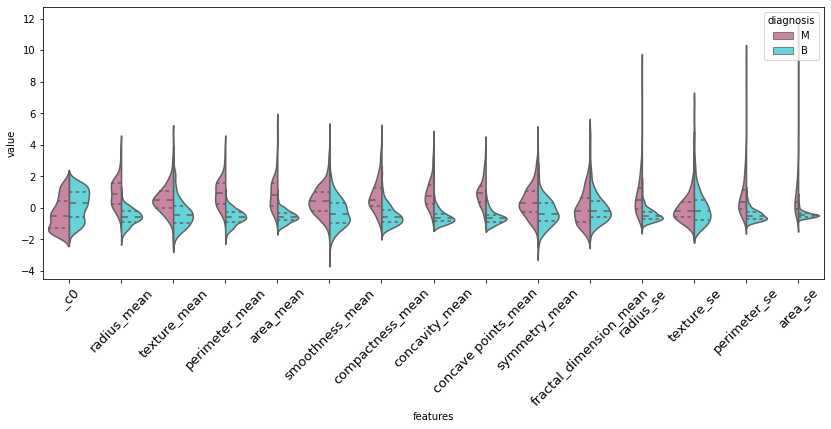

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data = df.drop('diagnosis',axis=1)
data2 = (data - data.mean()) / (data.std())      
data = pd.concat([df['diagnosis'],data2.iloc[:,0:15]],axis=1)
data = pd.melt(data,id_vars="diagnosis", var_name="features", value_name='value')

colors = ["#d679a2", "#53e3ec"]
plt.figure(figsize=(14,5))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data, split=True, palette=colors, inner="quart")
plt.xticks(rotation=45,fontsize=13)

Reference Link: https://www.geeksforgeeks.org/violin-plot-for-data-analysis/

Understanding the plot above, if the median of the Malignant and Benign looks like they are separated, it can be assumed that they are good for classification. If they look not separated, they are assumed to have no good information for classification. Here we can see texture_mean has a median that looks separate, whereas fractal_dimension_mean looks different.

***Using KERNEL DENSITY ESTIMATE plot for each mean feature***

This is useful in understanding the probability distribution of multiple samples in a single plot.

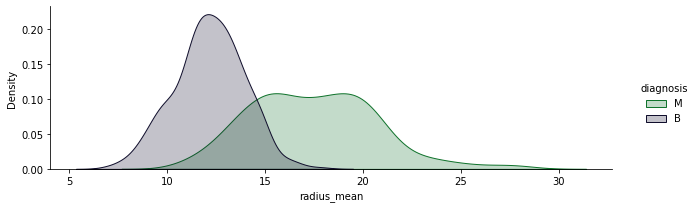

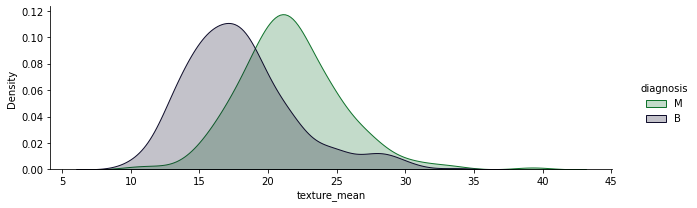

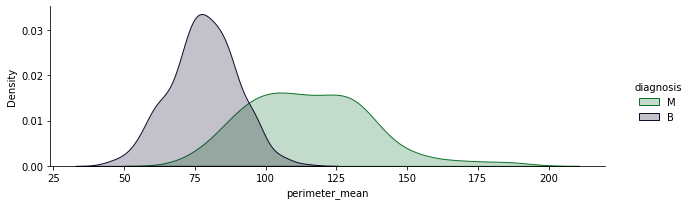

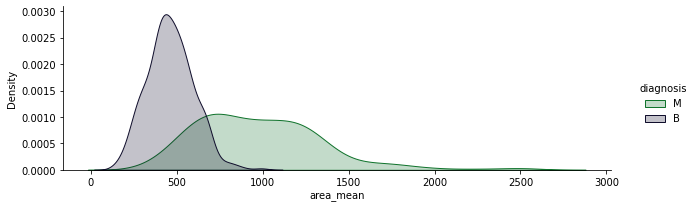

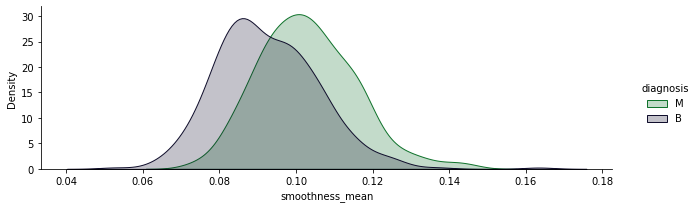

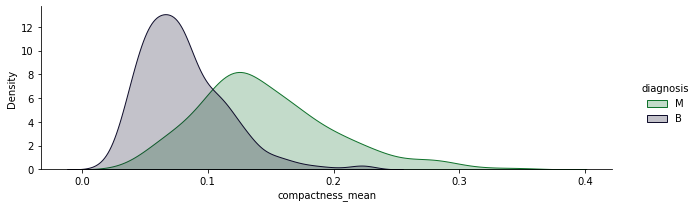

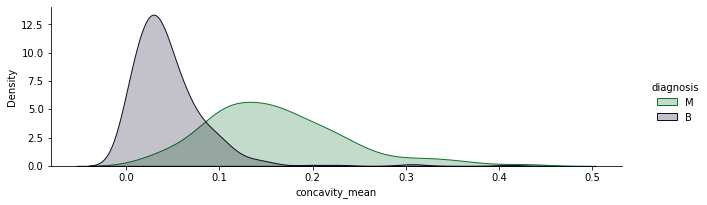

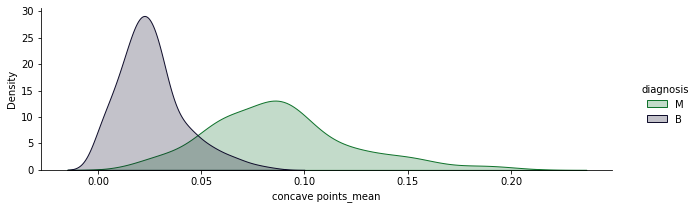

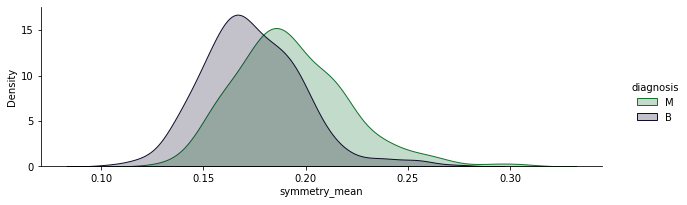

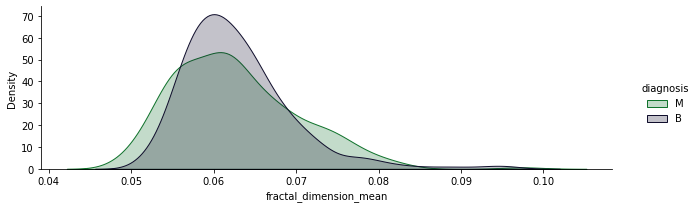

In [ ]:
mean_column = [col for col in df.columns if col.endswith('_mean')]
colors = ["#10732c", "#100e2c"]
for i in range(len(mean_column)):
    sns.FacetGrid(df, hue="diagnosis", palette=colors, aspect=3, margin_titles=True)\
    .map(sns.kdeplot, mean_column[i], shade= True).add_legend()

Reference Link:   https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/

**HEATMAP for understanding CORRELATION**

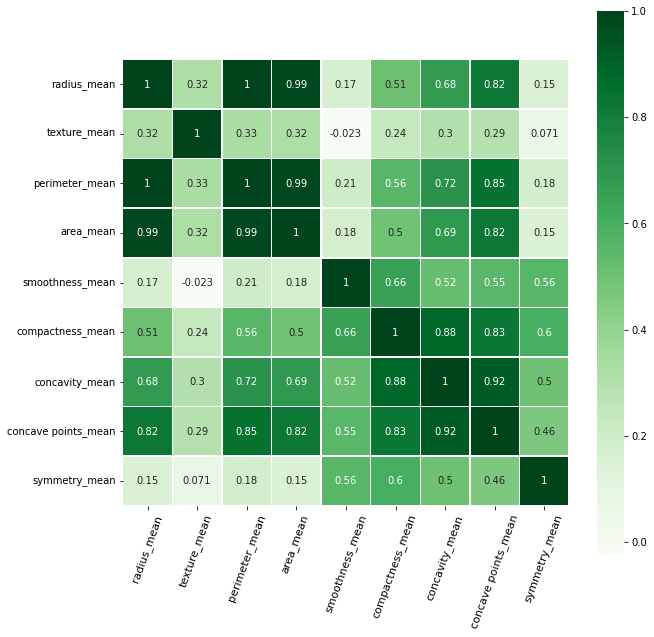

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df[mean_list].corr(), annot=True, square=True, cmap='Greens', linewidths=.5)
plt.xticks(fontsize=11,rotation=70)
plt.show()

Reference Link: https://towardsdatascience.com/annotated-heatmaps-in-5-simple-steps-cc2a0660a27d

**Obseravtions**


*   We can see that the radius, perimeter and area are highly correlated, which can be useful in our analysis.
*   compactness_mean, concavity_mean and concavepoint_mean are also highly correlated, which can be used for our analysis.








**SCATTER MATRIX**

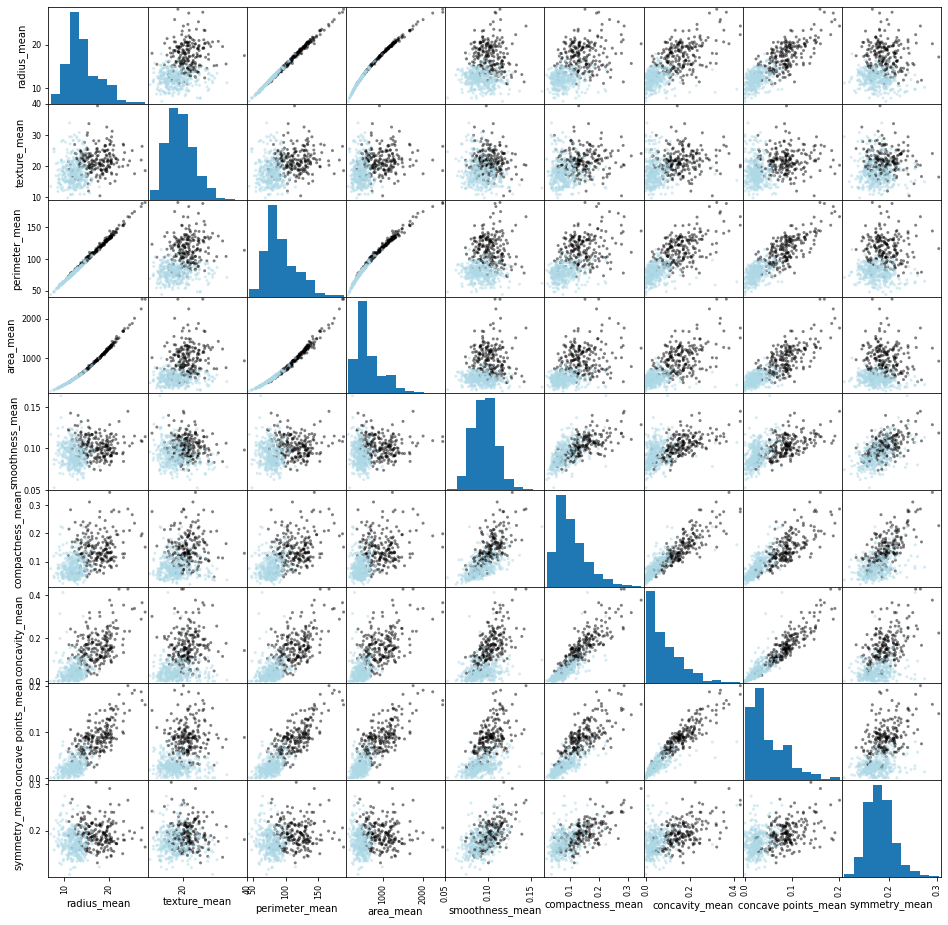

In [ ]:
from pandas.plotting import scatter_matrix
color_dic = {'B':'lightblue', 'M':'black'}
colors = df['diagnosis'].map(lambda x: color_dic.get(x))
sm = scatter_matrix(df[mean_list], c=colors, alpha=0.5, figsize=((16,16)));
plt.show()

Reference Link: https://www.geeksforgeeks.org/scatter-plot-matrix/

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import time
df.head(10)

,_c0,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [ ]:
palette ={'B' : 'red', 'M' : 'green'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
def plot_scatter(a,b,k):
    plt.subplot(k)
    sns.scatterplot(x = df[a], y = df[b], hue = "diagnosis",
                    data = df, palette = palette, edgecolor=edgecolor)
    plt.title(a + ' vs ' + b,fontsize=15)
    k+=1

<Figure size 864x864 with 0 Axes>

**SCATTERPLOT FOR POSITIVELY CORRELATED FEATURES**

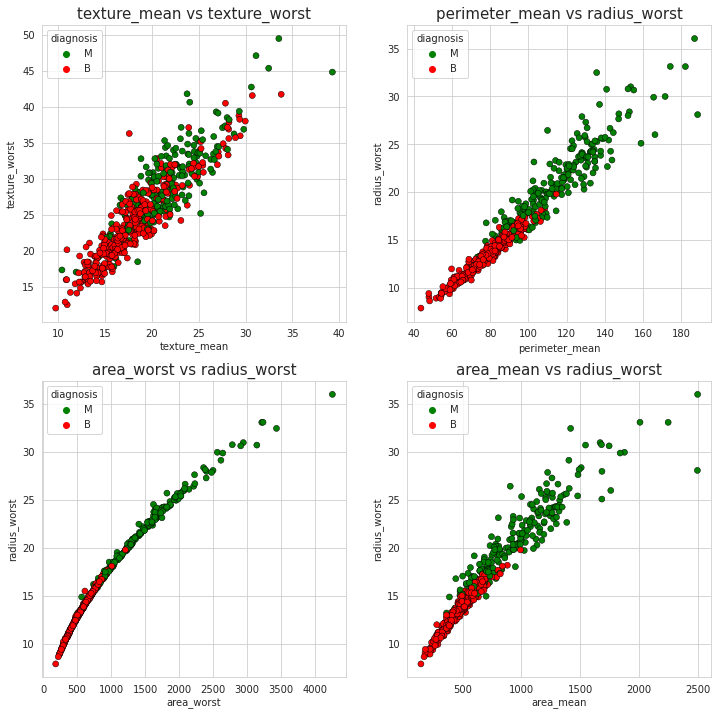

In [ ]:
fig = plt.figure(figsize=(12,12))
plot_scatter('texture_mean','texture_worst',221)
plot_scatter('perimeter_mean','radius_worst',222)
plot_scatter('area_worst','radius_worst',223)   
plot_scatter('area_mean','radius_worst',224)  

**SCATTERPLOT FOR NEGATIVELY CORRELATED FEATURES**

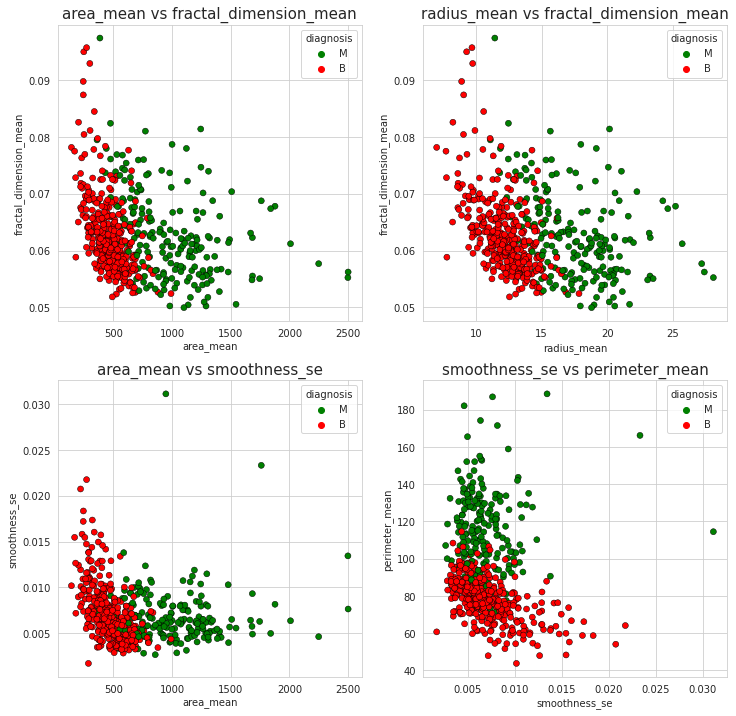

In [ ]:
fig = plt.figure(figsize=(12,12))
plot_scatter('area_mean','fractal_dimension_mean',221)
plot_scatter('radius_mean','fractal_dimension_mean',222)
plot_scatter('area_mean','smoothness_se',223)
plot_scatter('smoothness_se','perimeter_mean',224)

**SCATTERPLOT FOR UN-CORRELATED FEATURES**

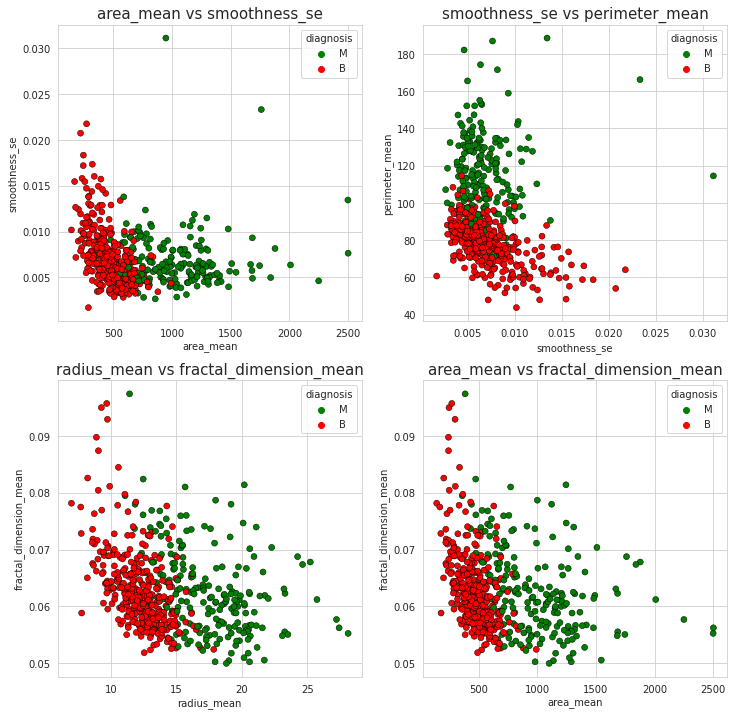

In [ ]:
fig = plt.figure(figsize=(12,12))
plot_scatter('area_mean','smoothness_se',221)
plot_scatter('smoothness_se','perimeter_mean',222)
plot_scatter('radius_mean','fractal_dimension_mean',223)
plot_scatter('area_mean','fractal_dimension_mean',224)